<a href="https://colab.research.google.com/github/nasim3333/201220036_Muhammad_Nasim_UAS/blob/main/201220036_Muhammad_Nasim_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#load dataset
from google.colab import files
uploaded = files.upload()

Saving Stroke Dataset .csv to Stroke Dataset .csv


In [126]:
#Load DataSet
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
import pickle
from imblearn.over_sampling import SMOTE
import io
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

import os

data = pd.read_csv(io.BytesIO(uploaded['Stroke Dataset .csv']))

data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [95]:
print(uploaded.keys())


dict_keys(['Stroke Dataset .csv'])


In [96]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [97]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<ipython-input-98-13dddc78546c>:7: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(14)


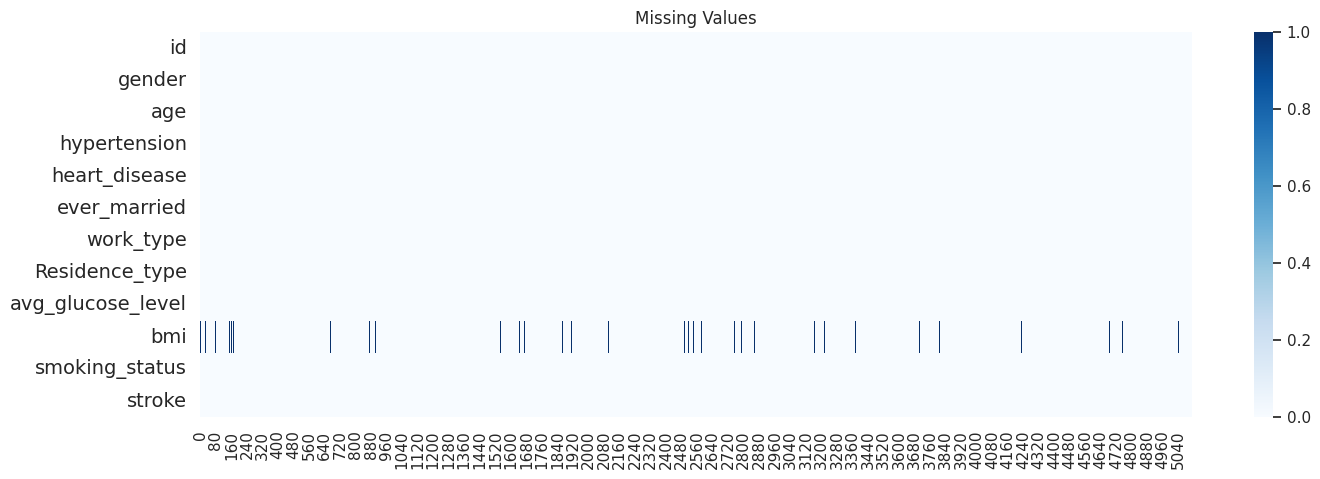

In [98]:
f, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(16,5))

sns.heatmap(data.T.isna(), cmap='Blues')
ax.set_title('Missing Values')

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

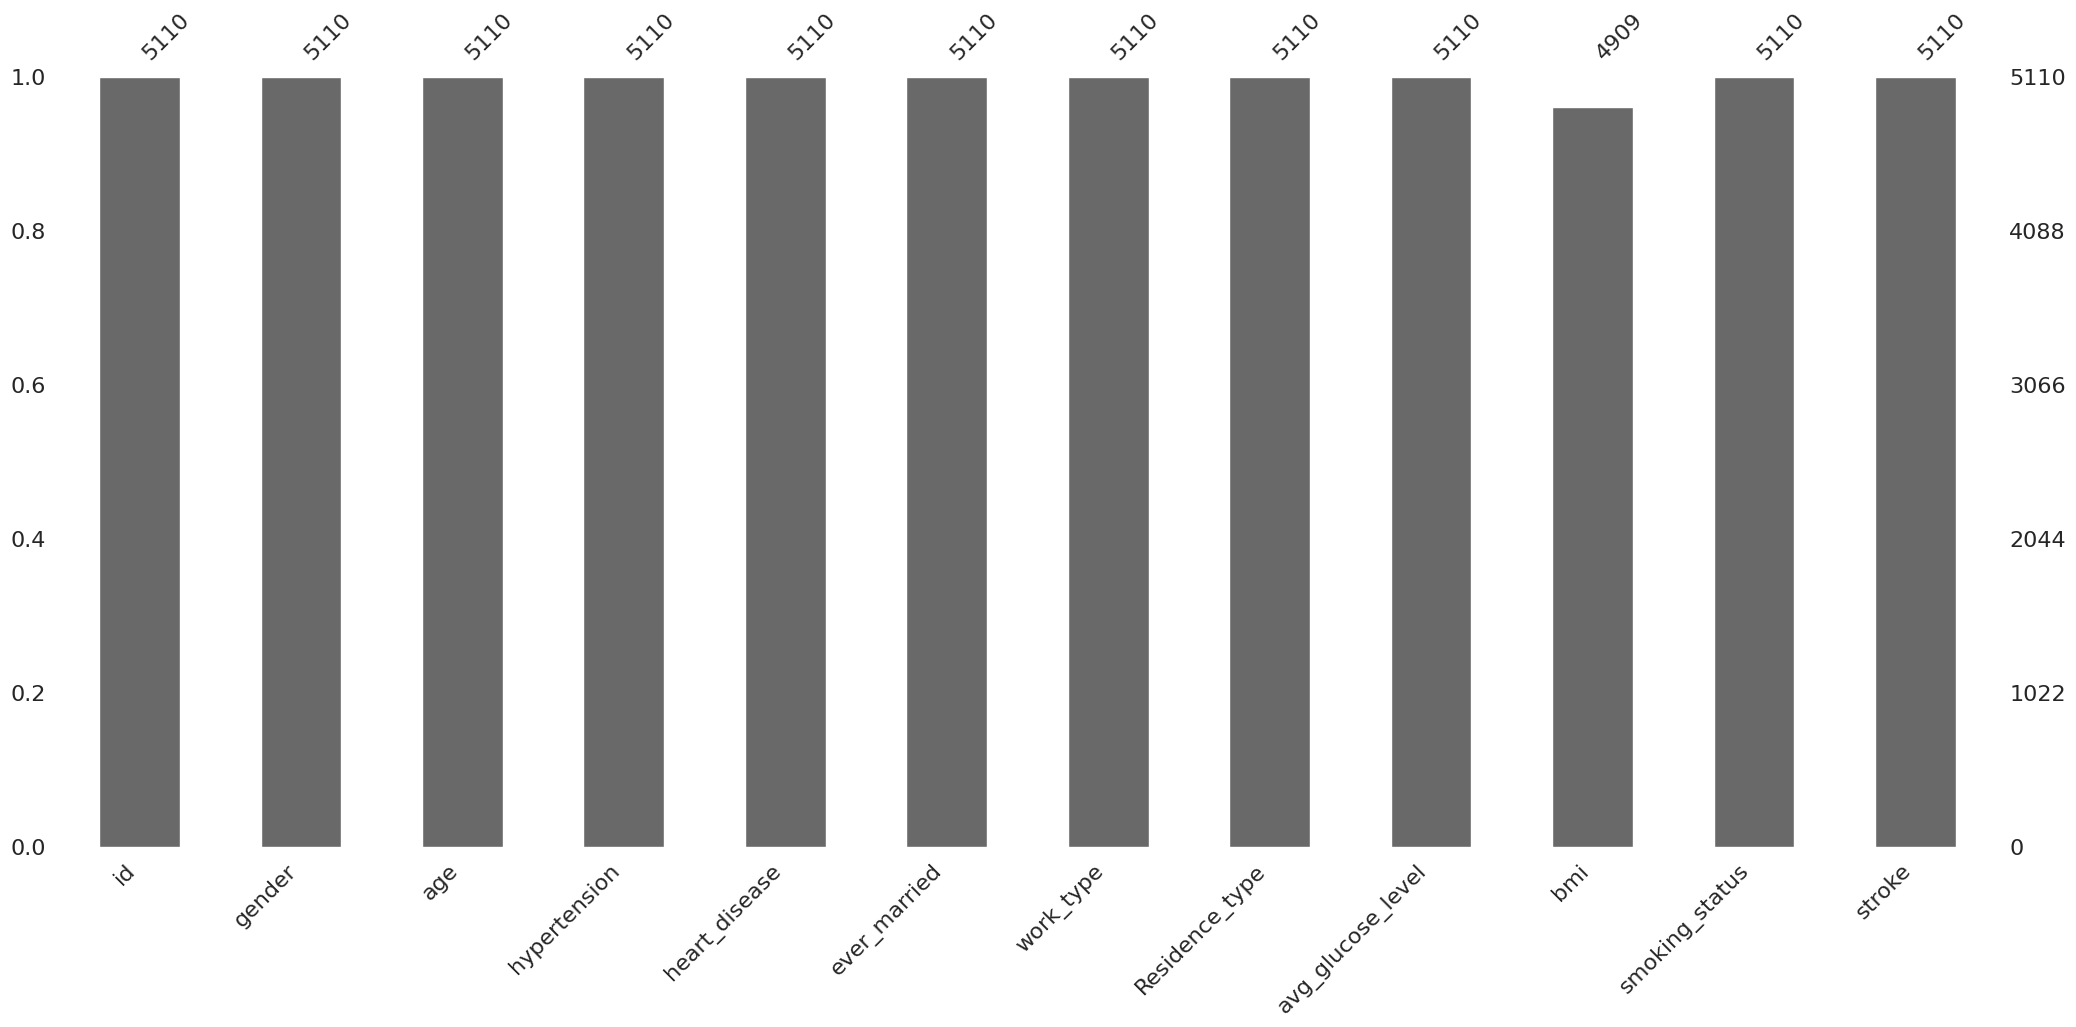

In [99]:
import missingno as msno
msno.bar(data)
plt.show()

In [100]:
data.bmi.replace(to_replace=np.nan, value=data.bmi.mean(),inplace=True)

In [101]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<ipython-input-102-59717d1fd51d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

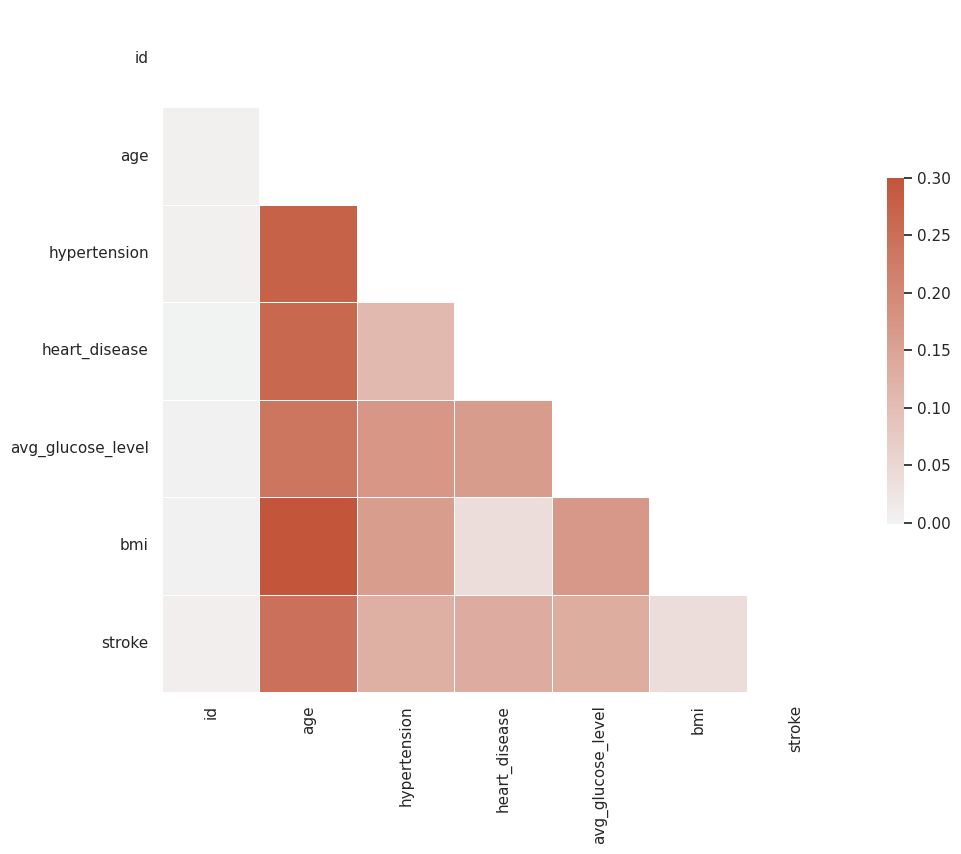

In [102]:
corr = data.corr()

# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr,dtype=bool))

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# generate a custom diverging colormap
cmap = sns.diverging_palette(230,20,as_cmap=True)

#draw the heatpmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,center=0,square=True,linewidths=.5,cbar_kws={'shrink':.5})

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


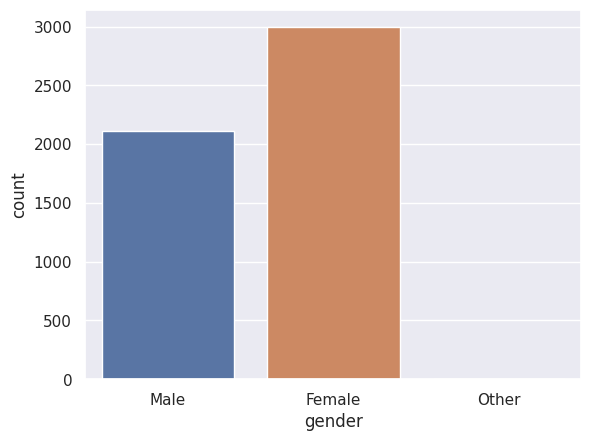

In [103]:
print(data.gender.value_counts())
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=data,x='gender')

Yes    3353
No     1757
Name: ever_married, dtype: int64


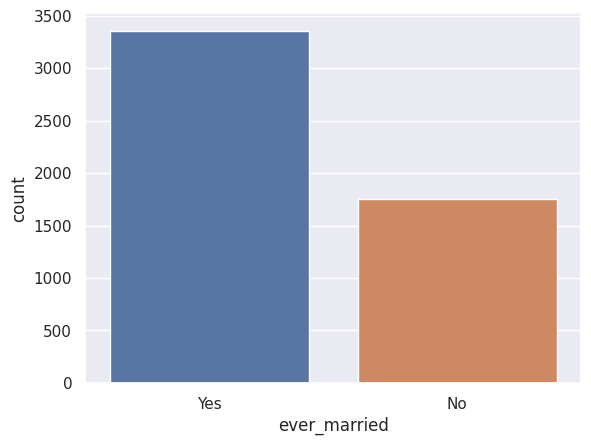

In [104]:
print(data.ever_married.value_counts())
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=data, x='ever_married')

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


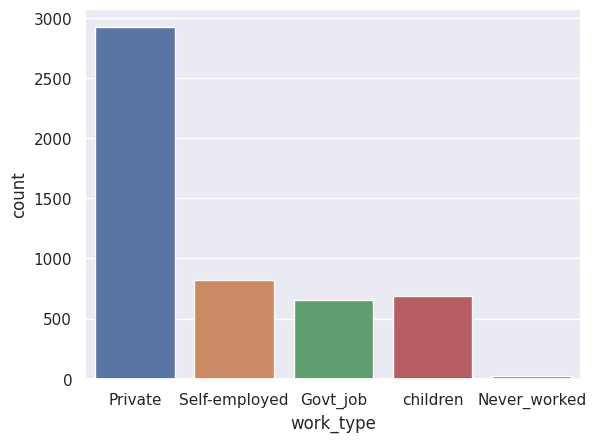

In [105]:
print(data.work_type.value_counts())
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=data,x='work_type')

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


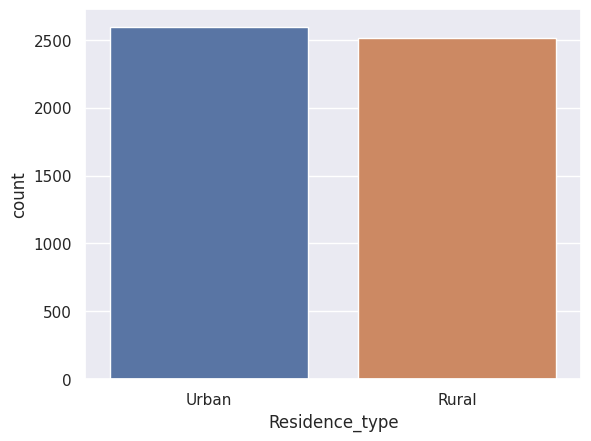

In [106]:
print(data.Residence_type.value_counts())
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=data,x='Residence_type')

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


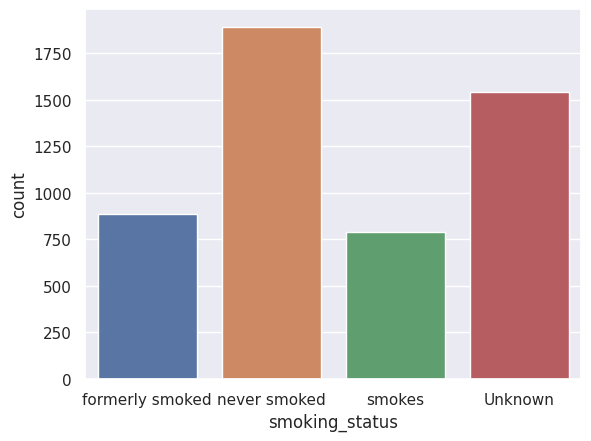

In [107]:
print(data.smoking_status.value_counts())
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=data,x='smoking_status')

0    4861
1     249
Name: stroke, dtype: int64


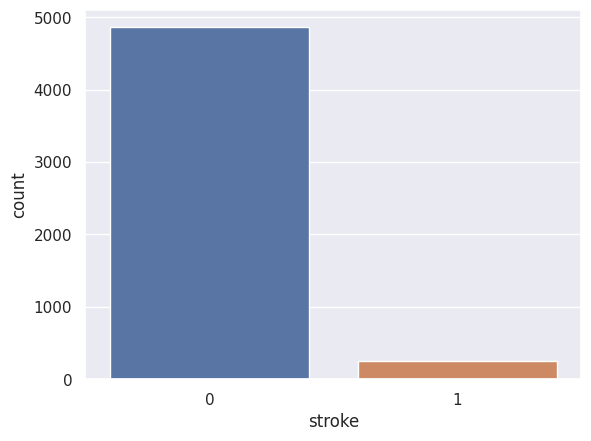

In [108]:
print(data.stroke.value_counts())
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=data,x='stroke')

<ipython-input-109-aa93ec202a41>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.avg_glucose_level,color='green',label='avg_glucose_level',kde=True)


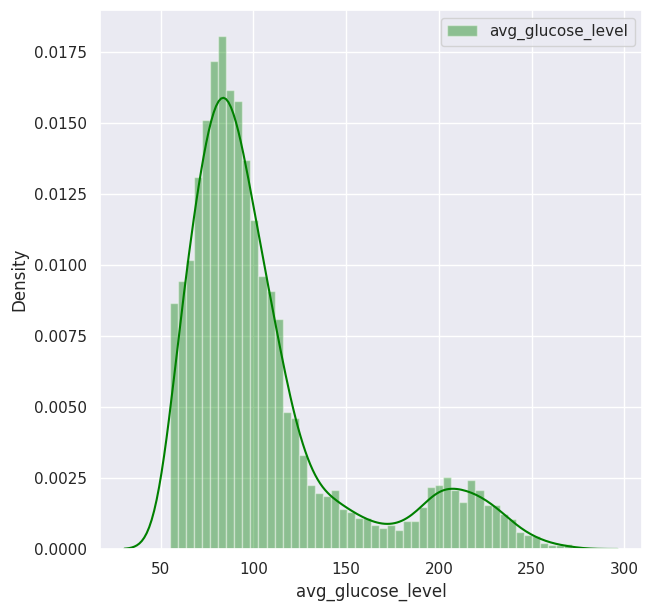

In [109]:
fig = plt.figure(figsize=(7,7))
sns.distplot(data.avg_glucose_level,color='green',label='avg_glucose_level',kde=True)
plt.legend()

<ipython-input-110-bfe2cb6a56c0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.bmi,color='orange',label='bmi',kde=True)


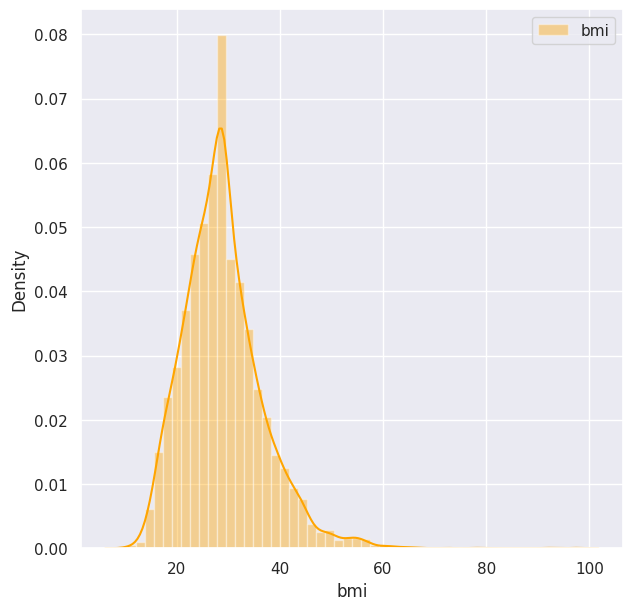

In [110]:
fig = plt.figure(figsize=(7,7))
sns.distplot(data.bmi,color='orange',label='bmi',kde=True)
plt.legend()

<ipython-input-111-02f09f777bb3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['stroke'] == 0]['bmi'],color='green')
<ipython-input-111-02f09f777bb3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['stroke'] == 1]['bmi'],color='red')


(10.0, 100.0)

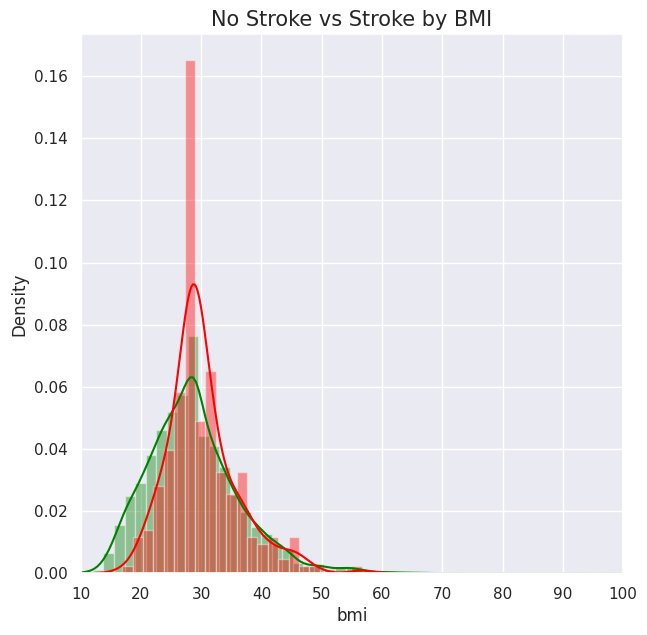

In [111]:
plt.figure(figsize=(7,7))
sns.distplot(data[data['stroke'] == 0]['bmi'],color='green')
sns.distplot(data[data['stroke'] == 1]['bmi'],color='red')

plt.title('No Stroke vs Stroke by BMI',fontsize=15)
plt.xlim([10,100])

<ipython-input-112-64928b392437>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['stroke'] == 0]['avg_glucose_level'],color='green')
<ipython-input-112-64928b392437>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['stroke'] == 1]['avg_glucose_level'],color='red')


(30.0, 330.0)

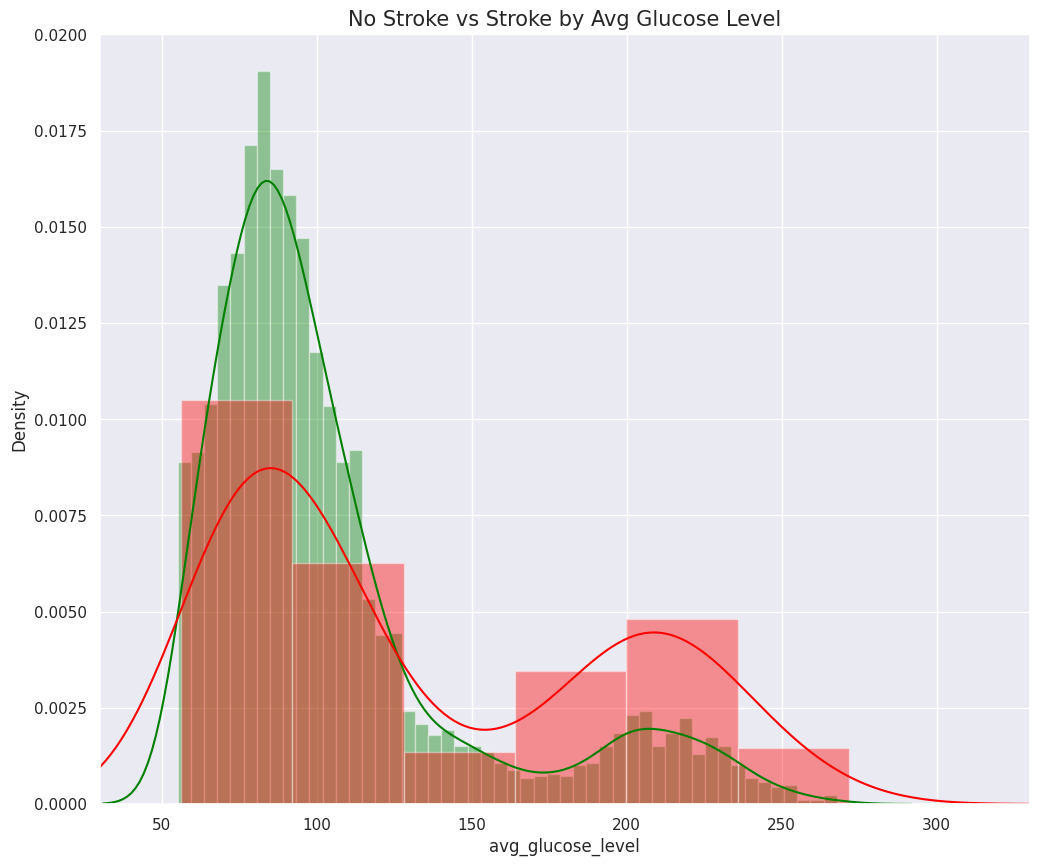

In [112]:
plt.figure(figsize=(12,10))
sns.distplot(data[data['stroke'] == 0]['avg_glucose_level'],color='green')
sns.distplot(data[data['stroke'] == 1]['avg_glucose_level'],color='red')
plt.title('No Stroke vs Stroke by Avg Glucose Level',fontsize=15)
plt.xlim([30,330])

<ipython-input-113-714dfc6285a4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['stroke'] == 0]['age'],color='green')
<ipython-input-113-714dfc6285a4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['stroke'] == 1]['age'],color='red')


(18.0, 100.0)

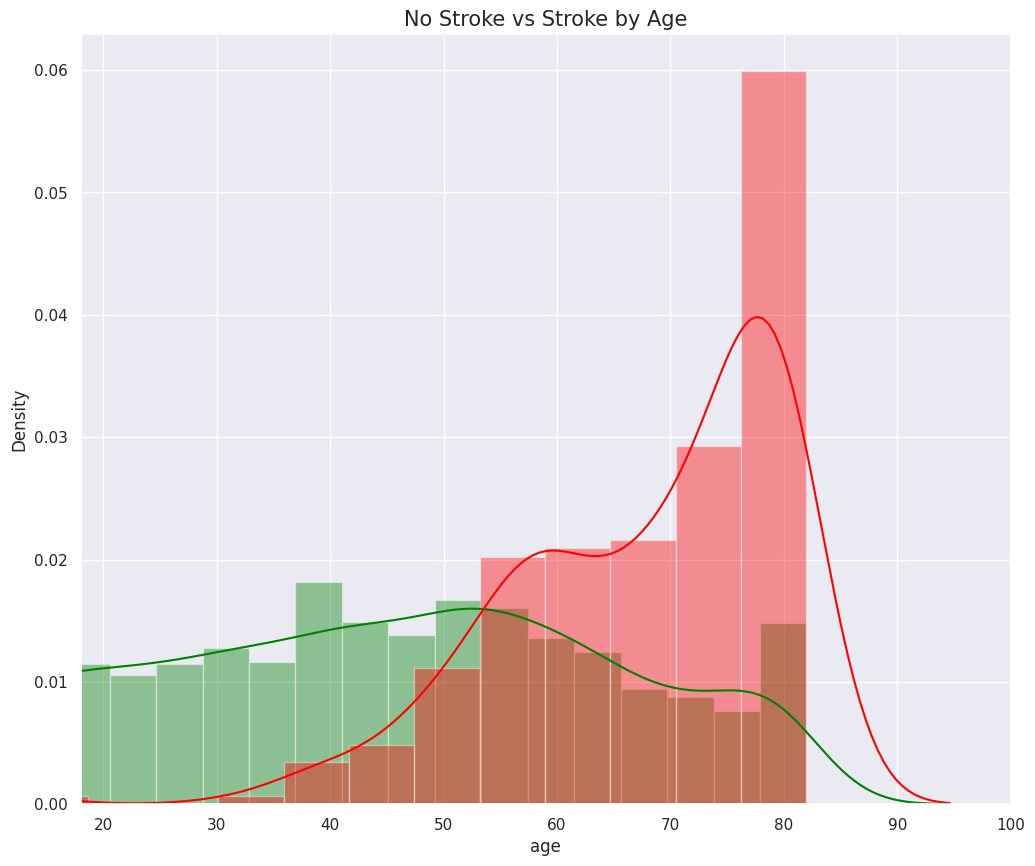

In [113]:
plt.figure(figsize=(12,10))
sns.distplot(data[data['stroke'] == 0]['age'],color='green')
sns.distplot(data[data['stroke'] == 1]['age'],color='red')
plt.title('No Stroke vs Stroke by Age',fontsize=15)
plt.xlim([18,100])

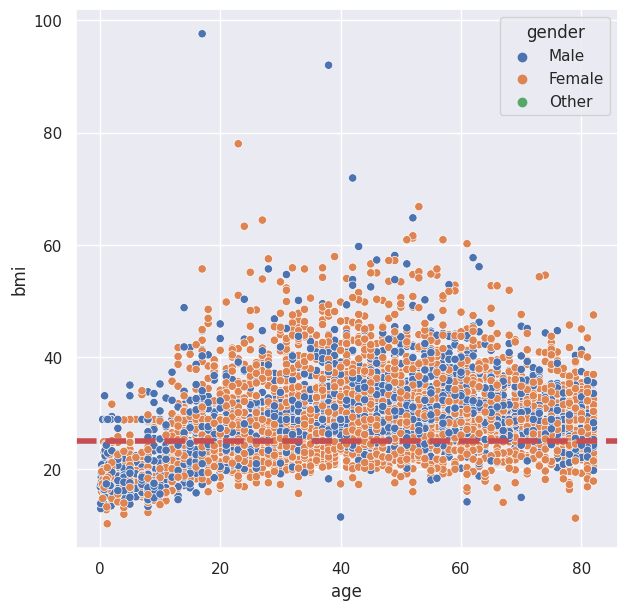

In [114]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=data,x='age',y='bmi',hue='gender')
graph.axhline(y=25, linewidth=4,color='r',linestyle= '--')

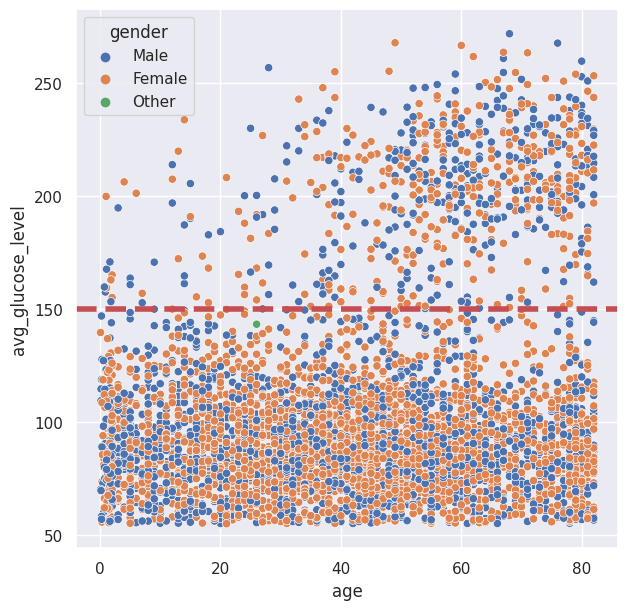

In [115]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=data,x='age',y='avg_glucose_level',hue='gender')
graph.axhline(y=150,linewidth=4,color='r',linestyle='--')

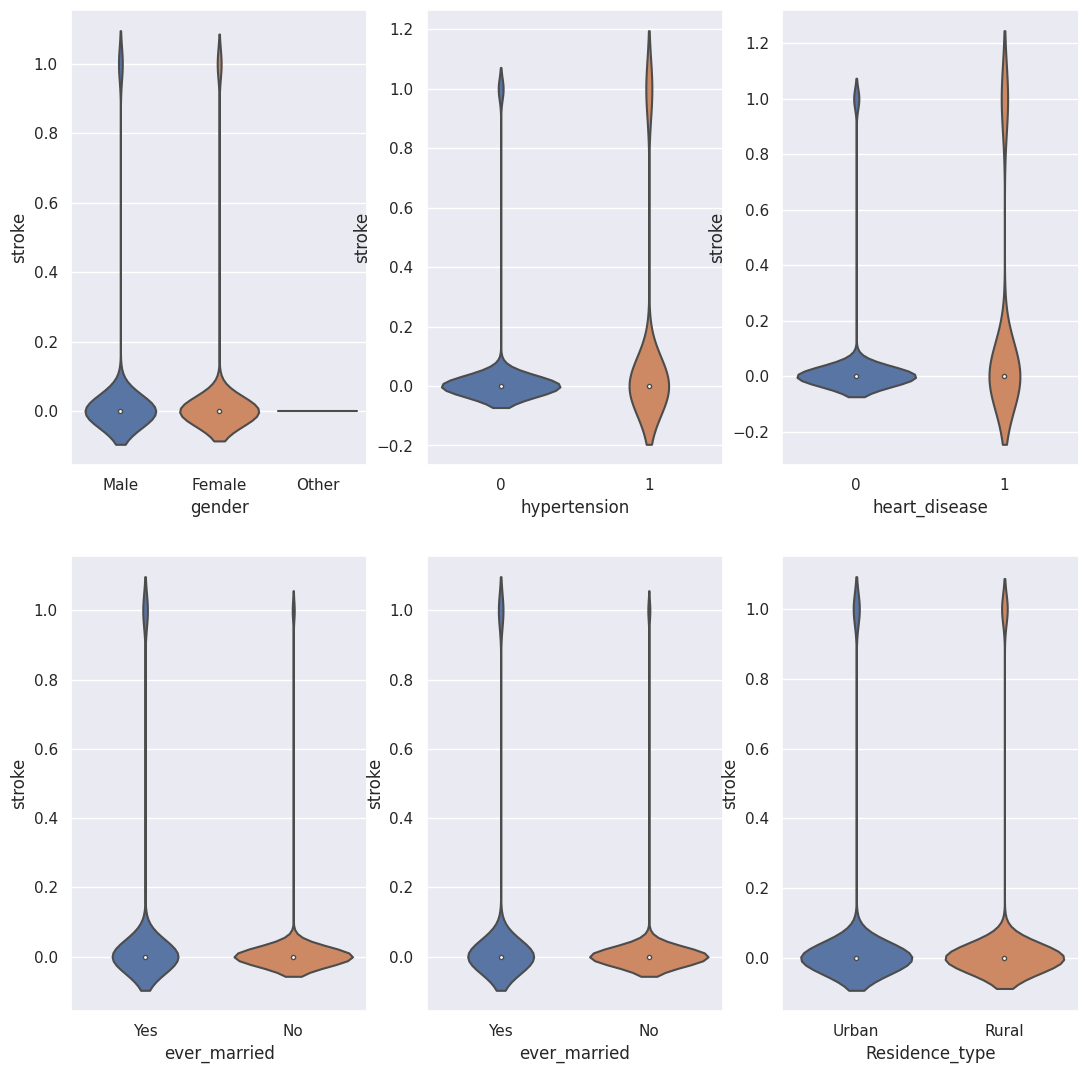

In [116]:
plt.figure(figsize=(13,13))
sns.set_theme(style='darkgrid')
plt.subplot(2,3,1)
sns.violinplot(x='gender',y='stroke',data=data)
plt.subplot(2,3,2)
sns.violinplot(x='hypertension',y='stroke',data=data)
plt.subplot(2,3,3)
sns.violinplot(x='heart_disease',y='stroke',data=data)
plt.subplot(2,3,4)
sns.violinplot(x='ever_married',y='stroke',data=data)
plt.subplot(2,3,5)
sns.violinplot(x='ever_married',y='stroke',data=data)
plt.subplot(2,3,6)
sns.violinplot(x='Residence_type',y='stroke',data=data)
plt.show()

<Figure size 1000x1000 with 0 Axes>

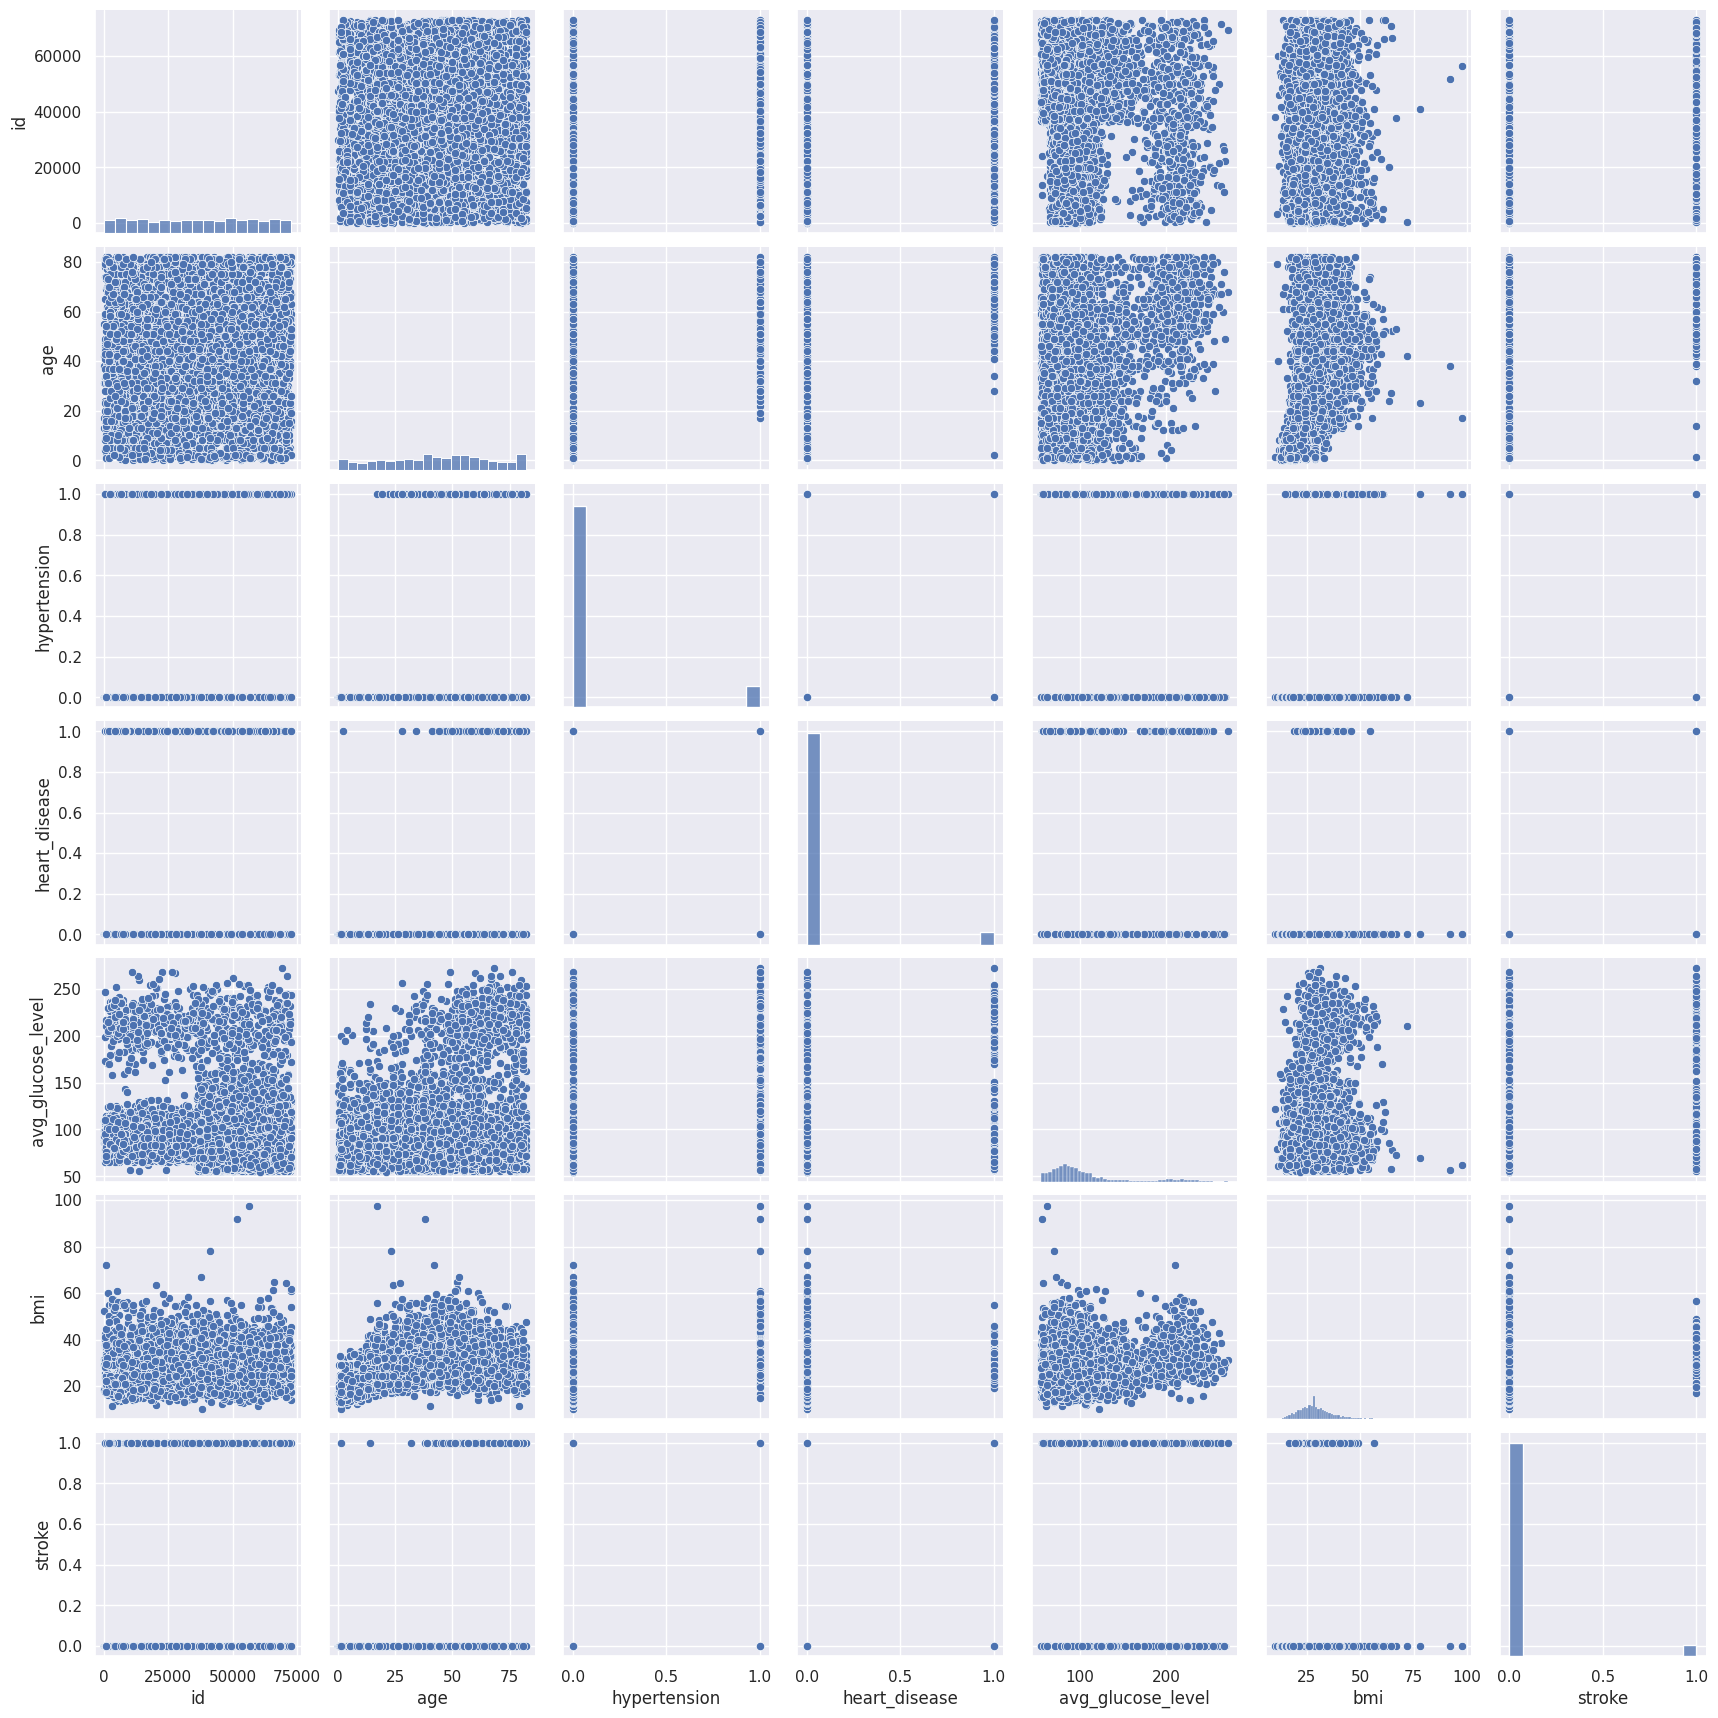

In [117]:
fig = plt.figure(figsize=(10,10))
sns.pairplot(data)
plt.show()

In [118]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [119]:
#Handling missing value dengan mean data
import math
data['bmi'].fillna(math.floor(data['bmi'].mean()),inplace=True)
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [147]:
label_encoder = LabelEncoder()

In [148]:
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['ever_married'] = le.fit_transform(data['ever_married'])
data['work_type'] = le.fit_transform(data['work_type'])
data['Residence_type'] = le.fit_transform(data['Residence_type'])
data['smoking_status'] = le.fit_transform(data['smoking_status'])

In [136]:
from sklearn.model_selection import train_test_split
X  = data.drop('stroke',axis=1)
y = data['stroke']

In [137]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=42)

In [138]:
from xgboost import XGBClassifier

# buat XGBoostClassifier
XGB_model = XGBClassifier()

In [139]:

# Membuat instance model
XGB_model = XGBClassifier()

# Melatih model
XGB_model.fit(X_train, y_train)

# Langkah Prediksi setelah pelatihan
xgb_prediction = XGB_model.predict(X_test)

In [140]:
#Prediction
xgb_prediction=XGB_model.predict(X_test)

In [141]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,xgb_prediction))

[[951   9]
 [ 55   7]]


In [157]:
print(classification_report(y_test,xgb_prediction))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       960
           1       0.44      0.11      0.18        62

    accuracy                           0.94      1022
   macro avg       0.69      0.55      0.57      1022
weighted avg       0.91      0.94      0.92      1022



In [142]:
import pickle

pickle.dump(XGB_model,open('XGB.pkl','wb'))

In [68]:
!pip install streamlit -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.5 MB/s eta 0:00:00


In [159]:
!wget -q -O - ipv4.icanhazip.com

35.231.231.226


In [70]:
!pip install pandas-profiling ==3.2.0
!pip install ydata-profiling
!pip install streamlit-pandas_profiling


ERROR: Invalid requirement: '==3.2.0'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=2afe55e9ee8c3e0e5b5b3b6f77e3aadfc82fa688ef95e5e99bfcc05bd7e4eb5a
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing inst

In [ ]:
! streamlit run app.py & npx localtunnel --port 8501

[#.................] - fetchMetadata: sill resolveWithNewModule follow-redirect


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.231.231.226:8501

npx: installed 22 in 3.189s
your url is: https://brave-candles-rhyme.loca.lt
/usr/local/lib/python3.10/dist-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/usr/local/lib/python3.10/dist-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/st

In [75]:
!pip install pydantic==1.9.0  # or the latest compatible version


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 24.1 MB/s eta 0:00:00
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.5.3
    Uninstalling pydantic-2.5.3:
      Successfully uninstalled pydantic-2.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.
inflect 7.0.0 requires pydantic>=1.9.1, but you have pydantic 1.9.0 which is incompatible.
ydata-profiling 4.6.4 requires pydantic>=2, but you have pydantic 1.9.0 which is incompatible.


In [67]:
print(data.columns)


Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [145]:
print(data.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [150]:
data = pd.get_dummies(data, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])
